## Clustering for Customer Segmentation

Problem: It contains all the transactions from 1-12-2010 to 9-12-2011 for a UK based and registered online retail store. Many customers of the company are wholesalers.

Clustering is mainly used for marketing. Three  metrics are: RFM: R for recency in the purchase of order, Frequency of the purchases and M for monthly spend by the customer

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'Online+Retail.csv', sep= ",", encoding= 'ISO-8859-1', header= 0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Data Cleaning

In [9]:
np.round((df.isnull().sum())/len(df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [10]:
df.dropna(inplace= True)

In [12]:
df.shape

(406829, 8)

In [13]:
df['Amount'] = df['Quantity'] * df['UnitPrice']

Data Preparation for Modelling

deciding the attribute for making the clusters is important

creating new features:
- R: Recency= number of days since last purchase
- F: Frequesncy = number of transactions
- M: Monetary = total value of transactions

In [20]:
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [19]:
#frequency

frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns= ['CustomerID', 'frequency']
frequency

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [21]:
#merge the two dataframes:
group = pd.merge(monetary, frequency, on= 'CustomerID', how = 'inner')
group

,CustomerID,Amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [22]:
#recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%d-%m-%Y %H:%M')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [25]:
#compute the max_date:
max_date = df['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:50:00')

In [26]:
#compute the diff
df['diff'] = max_date - df['InvoiceDate']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [28]:
#finding recency 
recency = df.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [29]:
group = pd.merge(group, recency, on= 'CustomerID', how= 'inner')

In [34]:
group.rename(columns= {'diff': 'recency', 'Amount': 'monetary'}, inplace= True)

In [35]:
group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4372 non-null   float64        
 1   monetary    4372 non-null   float64        
 2   frequency   4372 non-null   int64          
 3   recency     4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [39]:
import datetime as dt

In [41]:
group['recency'] = group['recency'].dt.days
group

,CustomerID,monetary,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


because K-Means algo is sensitive to outliers. So, we need to treat outliers. 

#checks for using K-Means:
1. Outliers
2. Scaling: monetary vs frequency vs recency: distance between two points in monetary would be much larger than those of frequency and recency
3. 

<AxesSubplot:ylabel='monetary'>

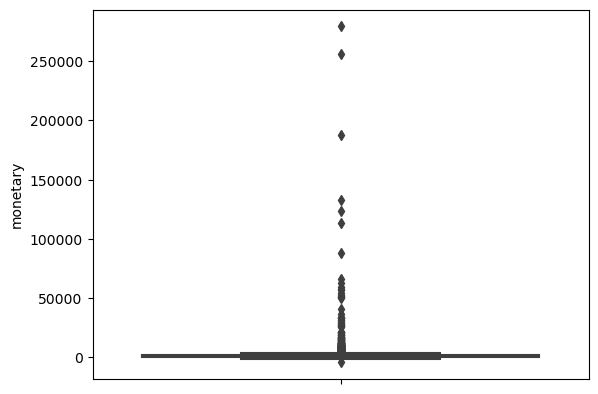

In [43]:
#1. outlier treatment
sns.boxplot(y = group['monetary'])

In [44]:
#two types of outliers:
# - statistical : beyond IQR
# - domain specific: high value customers should not be removed and discussed with business and then treated as different cluster.

<AxesSubplot:ylabel='frequency'>

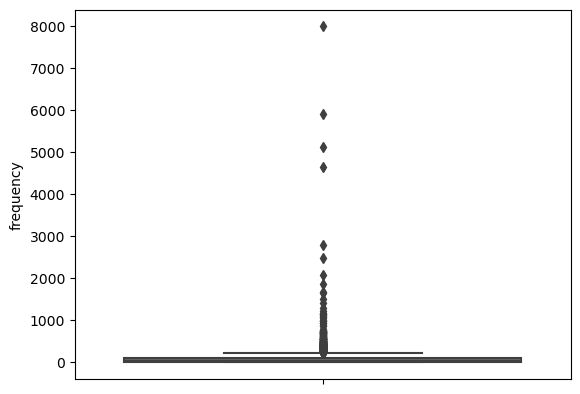

In [47]:
sns.boxplot(y = group['frequency'])

<AxesSubplot:ylabel='recency'>

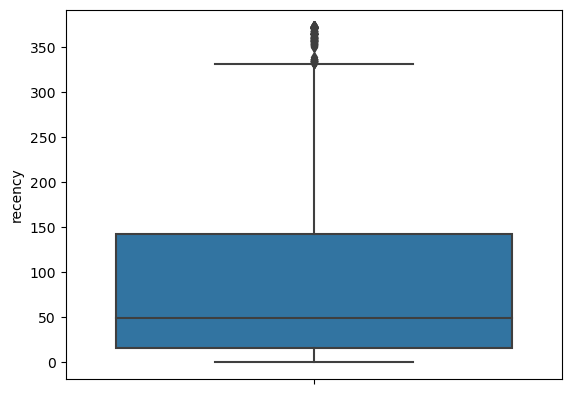

In [48]:
sns.boxplot(y = group['recency'])

In [49]:
#not removing the outliers

In [50]:
#2. Scaling

rfm_df = group[['monetary', 'frequency', 'recency']]
rfm_df

,monetary,frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2094.88,756,3


In [52]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()

#fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.23100099, -0.3917197 ,  2.32202285],
       [ 0.29343167,  0.38265697, -0.89373323],
       [-0.01231622, -0.26695902, -0.1691956 ],
       ...,
       [-0.20951263, -0.34439668, -0.83418219],
       [ 0.02390005,  2.85205812, -0.87388289],
       [-0.00744423, -0.0991774 , -0.48680114]])

In [75]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [76]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)

print("Hopkins Statistic result: ", hopkins(rfm_df_scaled))

Hopkins Statistic result:  0.994350087046645


Very high tendency to form clusters

In [78]:
rfm_df_scaled.columns= [['monetary', 'frequency', 'recency']]

In [79]:
rfm_df_scaled

,monetary,frequency,recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220
...,...,...,...
4367,-0.209026,-0.357303,1.845615
4368,-0.221167,-0.370209,0.882873
4369,-0.209513,-0.344397,-0.834182
4370,0.023900,2.852058,-0.873883


#### Modelling

In [81]:
from sklearn.cluster import KMeans

In [82]:
# K-Means with some arbitrary K

kmeans = KMeans(n_clusters = 4, max_iter = 50)
kmeans.fit(rfm_df_scaled)

C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

### Finding optimal number of K for clustering

In [85]:
#1. Elbow Method
ssd = []
range_n_cluster = [2,3,4,5,6,7,8]
for num_cluster in range_n_cluster:
    kmeans = KMeans(n_clusters = num_cluster, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\sklea

In [86]:
ssd

[8988.644490981607,
 5408.406395240114,
 4013.8332435074894,
 2937.955300849446,
 2323.166156599728,
 1863.0027543650078,
 1616.3984748076264]

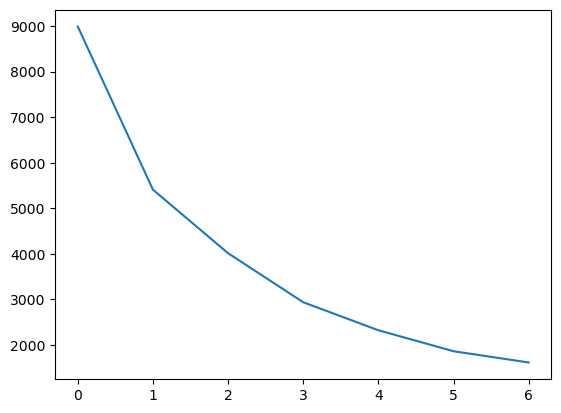

In [89]:
plt.plot(ssd)

In [90]:
# Silhoutte Analysis for finding the optimal number of K

from sklearn.metrics import silhouette_score

In [92]:
range_n_cluster = [2,3,4,5,6,7,8]

silhouette_score_list = []

for num_cluster in range_n_cluster:
    kmeans = KMeans(n_clusters = num_cluster, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score:
    silhouette_score_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    silhouette_score_list.append(silhouette_score_avg)
    print("For n_clusters= {}, the silhouette score is {}".format(num_cluster, silhouette_score_avg))

C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 2, the silhouette score is 0.9344641162235822


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 3, the silhouette score is 0.6003883114752382


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 4, the silhouette score is 0.5981422039499412


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 5, the silhouette score is 0.6160117259955692


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 6, the silhouette score is 0.5856955818362631


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 7, the silhouette score is 0.5238467453014489


C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


For n_clusters= 8, the silhouette score is 0.4723278463456119


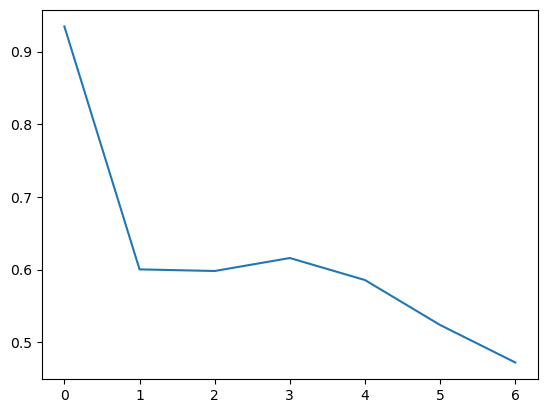

In [93]:
plt.plot(silhouette_score_list)

### Taking optimal K value as 3

In [94]:
#assigning the clusters to the customer_ID column
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(rfm_df_scaled)

C:\Users\govin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [95]:
kmeans.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [97]:
group['cluster_id'] = kmeans.labels_
group

,CustomerID,monetary,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0
4370,18283.0,2094.88,756,3,0


In [98]:
group['cluster_id'].unique()

array([2, 0, 1])

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

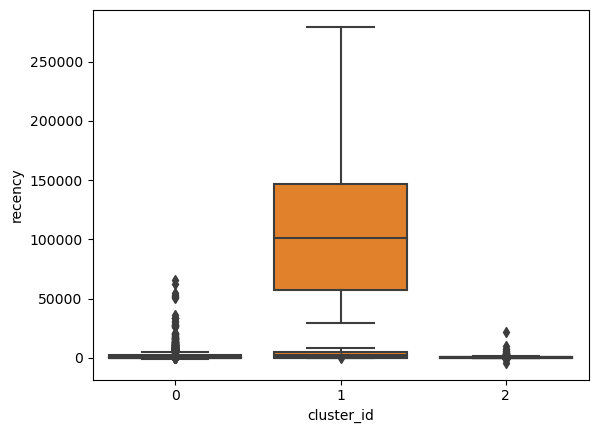

In [105]:
# columns = ['monetary', 'frequency', 'recency']
# for col in columns:
#     sns.boxplot(x= group['cluster_id'], y= group[col])
sns.boxplot(x= group['cluster_id'], y= group['monetary'])

Very wide range in monetary spent by the customers of cluster 2

<AxesSubplot:xlabel='cluster_id', ylabel='frequency'>

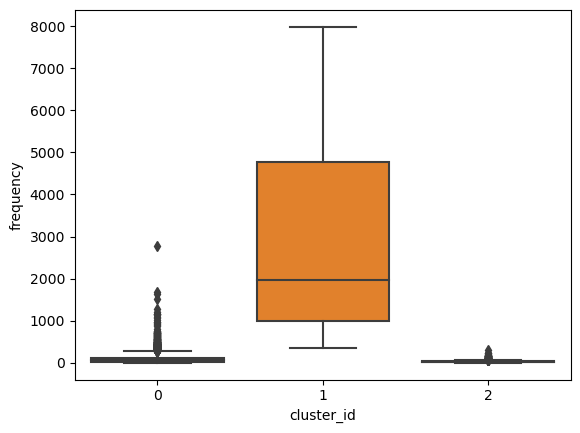

In [108]:
sns.boxplot(x= group['cluster_id'], y= group['frequency'])

customers in cluster 1 are the most frequent

<AxesSubplot:xlabel='cluster_id', ylabel='recency'>

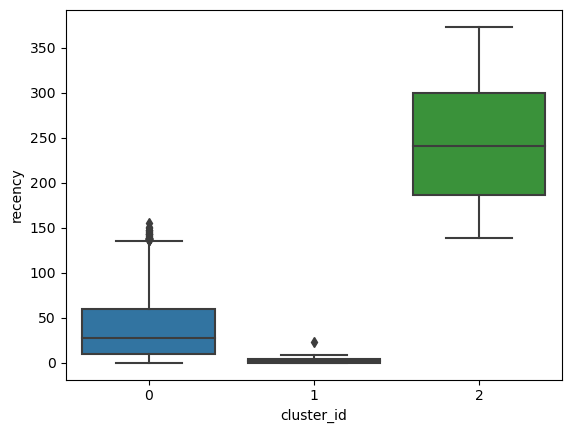

In [107]:
sns.boxplot(x= group['cluster_id'], y= group['recency'])

cluster 1 presents the most recent customers

Removing the outliers on the basis of statistics: 5 -95 percentiles is my range

In [109]:
columns = ['monetary', 'frequency', 'recency']
for col in columns:

    q1 = group[col].quantile(0.05)
    q3 = group[col].quantile(0.95)

    iqr = q3-q1
    group = group[(group[col] >= q1- 1.5*iqr) & (group[col] <= q3+ 1.5* iqr)]

In [112]:
group

,CustomerID,monetary,frequency,recency,cluster_id
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
...,...,...,...,...,...
4366,18278.0,173.90,9,73,0
4367,18280.0,180.60,10,277,2
4368,18281.0,80.82,7,180,2
4369,18282.0,176.60,13,7,0


In [113]:
#again scaling the features
rfm_df = group[['monetary', 'frequency', 'recency']]
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [114]:
rfm_df_scaled.shape

(4293, 3)

In [115]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)

In [116]:
hopkins(rfm_df_scaled)

0.9560622245886538

Very high cluster tendency

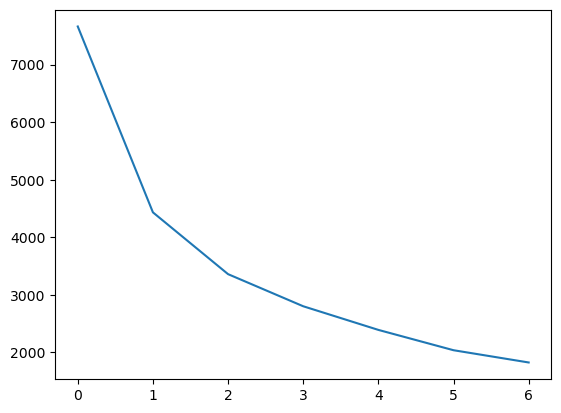

In [123]:
#applying KMeans algo
# again finding the optimal number of clusters:

# Elbow method:
ssd = []
n_range_cluster = [2,3,4,5,6,7,8]
for num_cluster in n_range_cluster:
    kmeans = KMeans(n_clusters = num_cluster, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
    
plt.plot(ssd)

again, k= 3 is the optimal number of clusters

In [124]:
# Silhouette method

range_n_cluster = [2,3,4,5,6,7,8]

silhouette_score_list = []

for num_cluster in range_n_cluster:
    kmeans = KMeans(n_clusters = num_cluster, max_iter = 50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score:
    silhouette_score_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    silhouette_score_list.append(silhouette_score_avg)
    print("For n_clusters= {}, the silhouette score is {}".format(num_cluster, silhouette_score_avg))

For n_clusters= 2, the silhouette score is 0.5415858652525395
For n_clusters= 3, the silhouette score is 0.5084896296141937
For n_clusters= 4, the silhouette score is 0.47782241003860476
For n_clusters= 5, the silhouette score is 0.46627005641897035
For n_clusters= 6, the silhouette score is 0.41766147997150216
For n_clusters= 7, the silhouette score is 0.4158077420309644
For n_clusters= 8, the silhouette score is 0.3879594558057553


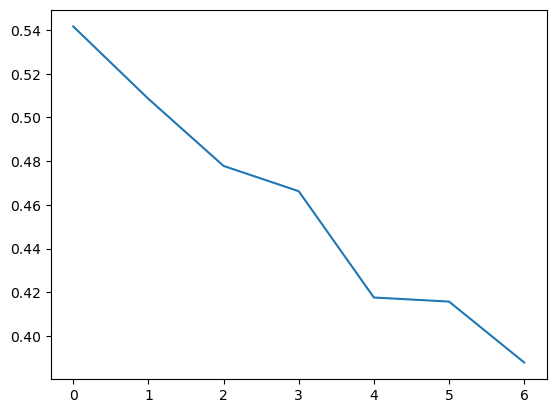

In [125]:
plt.plot(silhouette_score_list)

k = 3 is the optimal number of clusters

#### Final model with clusters = 3

In [127]:
kmeans = KMeans(n_clusters = 3, max_iter = 50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [129]:
group['cluster_id2'] = kmeans.labels_

In [130]:
group

,CustomerID,monetary,frequency,recency,cluster_id,cluster_id2
0,12346.0,0.00,2,325,2,2
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,2,2
...,...,...,...,...,...,...
4366,18278.0,173.90,9,73,0,0
4367,18280.0,180.60,10,277,2,2
4368,18281.0,80.82,7,180,2,2
4369,18282.0,176.60,13,7,0,0


<AxesSubplot:xlabel='cluster_id2', ylabel='monetary'>

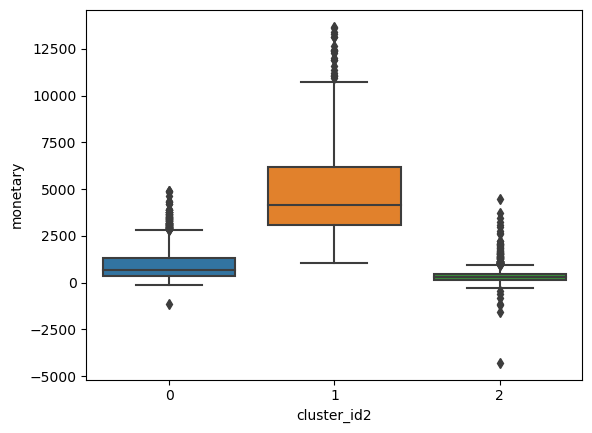

In [131]:
#comparing the clusters wrt features:
sns.boxplot(x = group['cluster_id2'], y = group['monetary'])

<AxesSubplot:xlabel='cluster_id2', ylabel='frequency'>

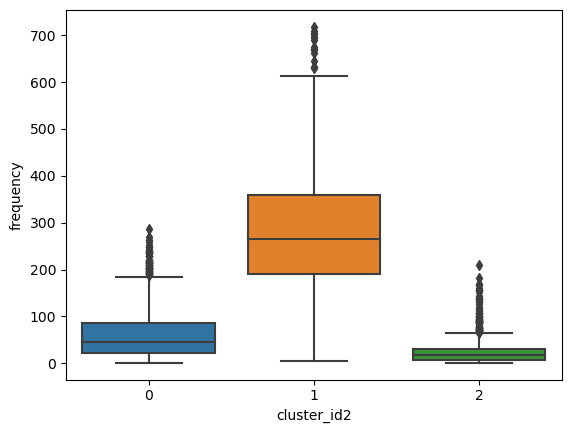

In [132]:
sns.boxplot(x = group['cluster_id2'], y = group['frequency'])

<AxesSubplot:xlabel='cluster_id2', ylabel='recency'>

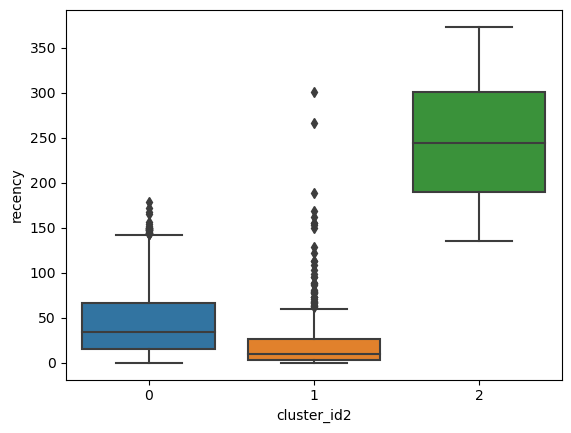

In [133]:
sns.boxplot(x = group['cluster_id2'], y = group['recency'])

Cluster 1 presents the most high value customers and most frequent customers

Cluster 0 presents the most recent customers

Cluster 2 is the unfavourable cluster of customers for the business given low value, low frequency and low recency

### Hierarchical Clustering

In [136]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

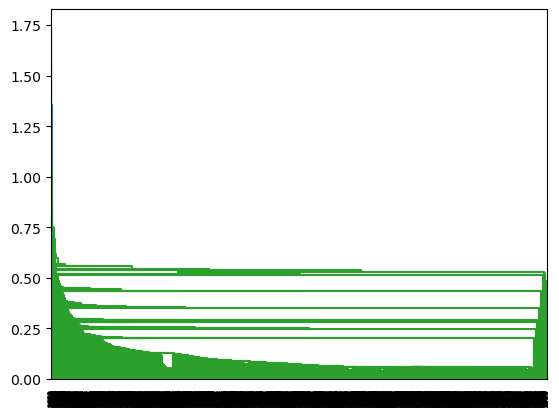

In [137]:
# single linkage

mergings = linkage(rfm_df_scaled, method= 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

Single linkage does not make any sense here, since it takes the minimum pairwise distance between points in the different clusters

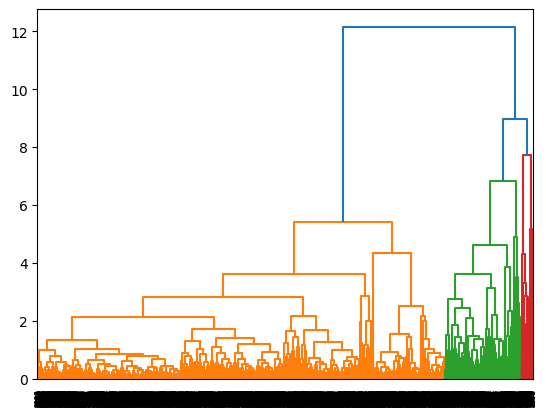

In [139]:
#complete linkage
mergings = linkage(rfm_df_scaled, method= 'complete', metric= 'euclidean')
dendrogram(mergings)
plt.show()

In [143]:
#way to extract clusters
# 3 clusters made
cluster_labels_h = cut_tree(mergings, n_clusters= 3).reshape(-1, ) #changing the shape of the array from (4293,1) to (4293, ). This is doneby putting (-1) which means no change in the no.of rows

In [144]:
group['cluster_labels_h'] = cluster_labels_h
group

,CustomerID,monetary,frequency,recency,cluster_id,cluster_id2,cluster_labels_h
0,12346.0,0.00,2,325,2,2,0
1,12347.0,4310.00,182,1,0,1,1
2,12348.0,1797.24,31,74,0,0,0
3,12349.0,1757.55,73,18,0,0,0
4,12350.0,334.40,17,309,2,2,0
...,...,...,...,...,...,...,...
4366,18278.0,173.90,9,73,0,0,0
4367,18280.0,180.60,10,277,2,2,0
4368,18281.0,80.82,7,180,2,2,0
4369,18282.0,176.60,13,7,0,0,0


<AxesSubplot:xlabel='cluster_labels_h', ylabel='monetary'>

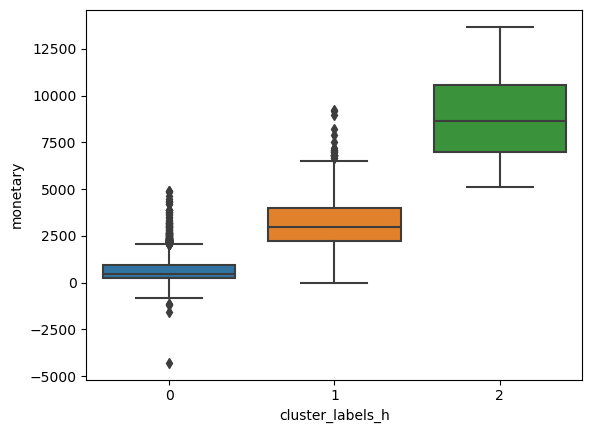

In [146]:
sns.boxplot(x= group['cluster_labels_h'], y= group['monetary'])

Cluster 2 presents the high value customers

<AxesSubplot:xlabel='cluster_labels_h', ylabel='frequency'>

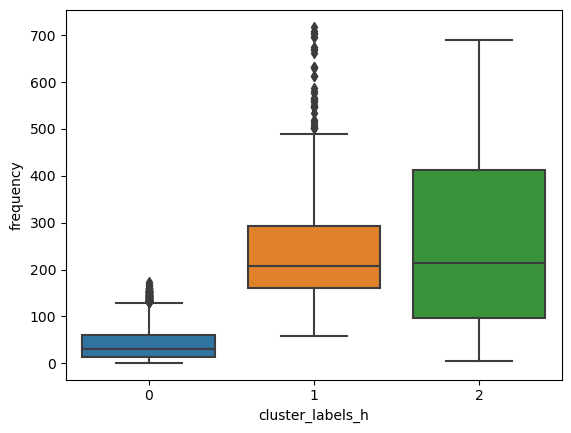

In [147]:
sns.boxplot(x= group['cluster_labels_h'], y= group['frequency'])

cluster 0 presents the low frequency

<AxesSubplot:xlabel='cluster_labels_h', ylabel='recency'>

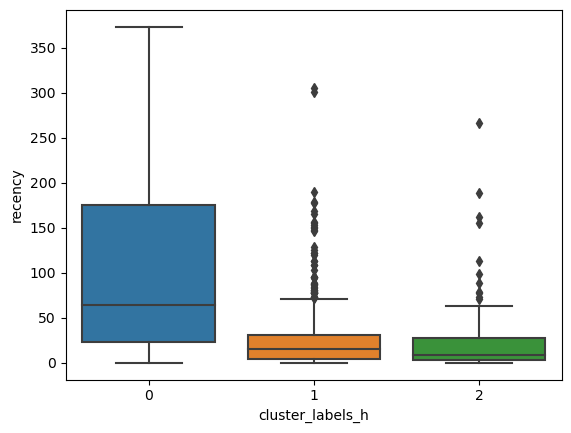

In [148]:
sns.boxplot(x= group['cluster_labels_h'], y= group['recency'])